<a href="https://colab.research.google.com/github/hBar2013/DS-Unit-2-Classification-2/blob/master/module3-making-decisions/kim_lowry_decisions_tree_cat_enc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
history_location = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Classification-2/master/data/lending-club-subset.csv'
current_location = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Classification-2/master/data/primaryMarketNotes_browseNotes_1-RETAIL.csv'

In [8]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.6MB/s 


In [0]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

# Stratified sample, 10% of expired Lending Club loans, grades A-D
# Source: https://www.lendingclub.com/info/download-data.action
history = pd.read_csv(history_location)
history['issue_d'] = pd.to_datetime(history['issue_d'], infer_datetime_format=True)

# Current loans available for manual investing, June 17, 2019
# Source: https://www.lendingclub.com/browse/browse.action
current = pd.read_csv(current_location)

In [0]:
# Train on the historical data.
# For the target, use `loan_status` ('Fully Paid' or 'Charged Off')
target = 'loan_status'
X = history.drop(columns=target)
y = history[target]

In [0]:
features = 'sub_grade'

In [41]:
# Do train/validate/test 3-way split
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=20000, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=20000, 
    stratify=y_trainval, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (88334, 149)
y_train shape (88334,)
X_val shape (20000, 149)
y_val shape (20000,)
X_test shape (20000, 149)
y_test shape (20000,)


In [43]:
X_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
123050,88343139.0,NaN,6000.0,6000.0,6000.0,36 months,7.99%,188.00,A,A4,Associate,8 years,OWN,25000.0,Not Verified,2016-08-01,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,630xx,MO,30.48,0.0,Aug-1996,745.0,749.0,0.0,73.0,NaN,9.0,0.0,9414.0,18.9%,15.0,w,0.0,0.0,6694.504455,6694.50,6000.00,679.50,15.0,0.00,0.0000,Aug-2018,2360.83,NaN,May-2019,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,19369.0,0.0,3.0,1.0,3.0,11.0,9955.0,69.0,0.0,0.0,3655.0,30.0,49800.0,2.0,0.0,0.0,3.0,2421.0,33256.0,18.5,0.0,0.0,113.0,240.0,47.0,11.0,2.0,47.0,NaN,14.0,73.0,0.0,3.0,4.0,4.0,7.0,4.0,6.0,9.0,4.0,9.0,0.0,0.0,0.0,1.0,93.3,0.0,0.0,0.0,64200.0,19369.0,40800.0,14400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
84074,68751394.0,NaN,5000.0,5000.0,5000.0,36 months,6.49%,153.23,A,A2,imprinter,10+ years,OWN,55000.0,Source Verified,2016-01-01,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,273xx,NC,17.09,1.0,May-2002,700.0,704.0,1.0,13.0,NaN,17.0,0.0,4875.0,22.4%,45.0,w,0.0,0.0,5512.582557,5512.58,5000.00,512.58,0.0,0.00,0.0000,Feb-2019,0.21,NaN,Feb-2019,689.0,685.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,243.0,17609.0,1.0,2.0,0.0,1.0,24.0,12230.0,61.0,1.0,7.0,1767.0,41.0,21800.0,0.0,0.0,1.0,8.0,1174.0,11773.0,26.0,0.0,0.0,164.0,101.0,3.0,3.0,1.0,3.0,NaN,3.0,NaN,0.0,5.0,8.0,8.0,12.0,21.0,14.0,22.0,8.0,17.0,0.0,0.0,0.0,1.0,95.5,0.0,0.0,0.0,42999.0,17609.0,15900.0,20144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N

In [0]:
X_train_sub = X_train[features]
X_val_sub = X_val[features]


In [48]:
X_train_sub.shape

(88334,)

In [0]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train_sub)
X_val_encoded = encoder.transform(X_val_sub)


In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_encoded, y_train)

print('Decision Tree')
print('Train Accuracy', dt.score(X_train_encoded, y_train))
print('Validation Accuracy', dt.score(X_val_encoded, y_val))

Decision Tree
Train Accuracy 0.8248579256005615
Validation Accuracy 0.82485


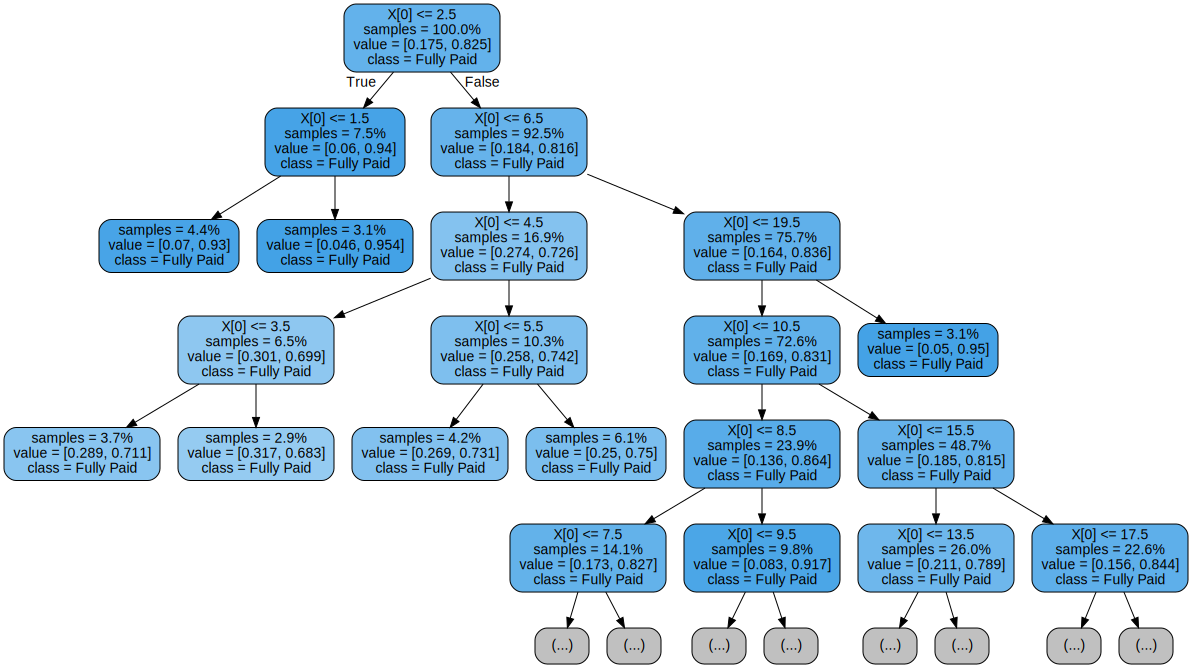

In [65]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, 
                           out_file=None, 
                           max_depth=5,  
                           class_names=dt.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rotate=False, 
                           rounded=True)

graphviz.Source(dot_data)

In [0]:
def mini_wrangle(X):
    X = X.copy()
    sub_grade_ranks = {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'B1': 6, 'B2': 7, 
                       'B3': 8, 'B4': 9, 'B5': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 
                       'C5': 15, 'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20}
    X['sub_grade'] = X['sub_grade'].map(sub_grade_ranks)
    return X

In [0]:
#now preserve order of sub_grade
X_train = mini_wrangle(X_train)
X_val   = mini_wrangle(X_val)

In [0]:
X_train_sub = X_train[features]
X_val_sub = X_val[features]
